## Micrograd


#### tiny autograd, implements backpropagation over a dynamically built DAG


In [2]:
from micrograd.engine import Value

a = Value(-4.0)
b = Value(2.0)

c = a + b
d = a * b + b**3

c += c + 1
c += 1 + c + (-a)

d += d * 2 + (b + a).relu()
d += 3 * d + (b - a).relu()

e = c - d
f = e**2
g = f / 2.0
g += 10.0 / f

print(f'{g.data:.4f}') # prints 24.7041, the outcome of this forward pass
g.backward()
print(f'{a.grad:.4f}') # prints 138.8338, i.e. the numerical value of dg/da
print(f'{b.grad:.4f}') # prints 645.5773, i.e. the numerical value of dg/db

24.7041
138.8338
645.5773


In [3]:
#always this imports
import math
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
def f(x):
    return 3*x**2 - 4*x + 5


In [5]:

f(3.0)

20.0

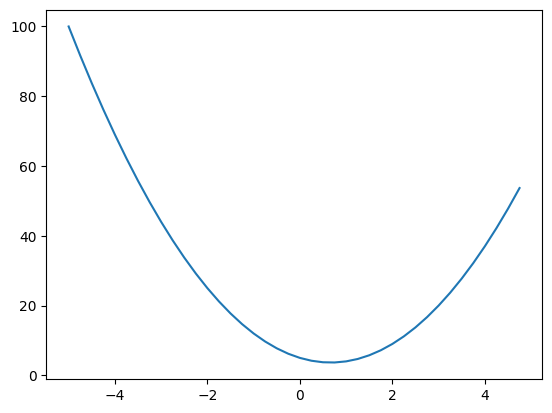

In [6]:
xs = np.arange(-5.0, 5.0, 0.25)
ys = f(xs)
plt.plot(xs, ys)

# Derivative (derivada?))

#### At its core, a derivative tells you about instantaneous rate of change.

### Think about driving a car:

    Your position is where you are on the road.

    Your speed is the rate of change of your position. (How much your position changes per unit of time).

    Your acceleration is the rate of change of your speed. (How much your speed changes per unit of time).

### In this analogy:

    Speed is the derivative of position.

    Acceleration is the derivative of speed (and the second derivative of position).


## The Mathematical View: The Slope

### In mathematics, the derivative of a function at a specific point is the slope of the tangent line to the function's graph at that point.

    A large positive slope means the function is increasing rapidly.

    A small positive slope means the function is increasing slowly.

    A slope of zero means the function is flat (at a peak, valley, or plateau).

    A negative slope means the function is decreasing.



    The Core Idea: A Derivative Measures Sensitivity

In both cases, a derivative answers the question: "If I change input X by a tiny amount, how much does output Y change?"
1. Derivatives in Options (The Greek Analogy)

In options trading, "Greeks" are literally derivatives. They measure the sensitivity of the option's price to various factors.

    Delta (Δ): The derivative of the option price with respect to the underlying asset's price.

        It tells you: "If the stock price moves by $1, how much will my option's price change?"

        Example: A Delta of 0.50 means the option price will change by ~$0.50 for a $1 move in the stock.

    Gamma (Γ): The derivative of Delta. It's the second derivative of the option price with respect to the underlying price.

        It tells you: "If the stock price moves by $1, how much will the Delta itself change?"

        This measures the stability of your hedge (Delta).

    Theta (Θ): The derivative of the option price with respect to time.

        It tells you: "If one day passes, how much value will my option lose (all else being equal)?"

        This is the famous "time decay."

    Vega (ν): The derivative of the option price with respect to implied volatility.

        It tells you: "If the market's expected volatility changes by 1%, how much will my option's price change?"

In summary, the Greeks are a practical, real-world application of derivatives. They are a sensitivity analysis toolkit for a trader.
2. Derivatives in Neural Networks (The "Greeks" of the Network)

A neural network is just a gigantic, complex function. Its goal is to map a set of inputs (e.g., pixel values) to a set of outputs (e.g., "cat," "dog"). It has thousands or millions of knobs to tune called weights (W) and biases (b).

The "output" we care about is the loss (L) or cost—a single number that measures how wrong the network's predictions are. We want to minimize this loss.

So, what's the most important question for the network?

    "If I change this specific weight (W) by a tiny amount, how much does the loss (L) change?"

This is exactly a derivative! Specifically, it's the derivative of the Loss (L) with respect to a single weight (W), written as dL/dW.

This derivative, dL/dW, is the network's Delta (Δ) for that specific weight.

    A large positive dL/dW means increasing weight W will significantly increase the loss (make the network worse).

    A large negative dL/dW means increasing weight W will significantly decrease the loss (make the network better).

    A dL/dW near zero means changing this weight has little effect; the network is stable around this value.

How This Affects Neural Networks: The Learning Process

This is where the magic happens. The process of using these derivatives to improve the network is called Gradient Descent.
<p>

    Forward Pass: The network makes a prediction. We calculate the loss (how wrong it was).

    Backward Pass (Backpropagation): This is the key step. The algorithm calculates the derivative of the loss with respect to every single weight in the network (dL/dW for all millions of W). This collection of derivatives is called the gradient.

        Backpropagation is essentially calculating the "Greeks" for every parameter in the model.

    Update: The network then updates each weight using a simple rule:
    W_new = W_old - learning_rate * (dL/dW)

        The learning_rate is just a small number, like 0.001, that controls how big of a step we take.

        Interpretation: If dL/dW is negative (lowering W reduces loss), the rule adds a positive value to W (W_new becomes larger). If dL/dW is positive, the rule subtracts from W. It always pushes the weight in the direction that reduces the loss.

    Repeat: This process is repeated for thousands of examples. With each step, the network's weights are tweaked just a little bit to make the overall loss a little bit smaller, and its predictions a little bit better.
<p>

$$
f'(x) = \lim_{h \to 0} \frac{f(x+h) - f(x)}{h}
$$

<p> Backpropagation is to calculate the weight(derivative(slope)) of each node in correlation of the result of the final node
</p>

In [7]:
h = 0.0000001
x = 3.0

# calculation of slope
print( (f(x + h) - f(x))/h )


14.000000305713911


In [8]:
#lets get more complex
# inputs
a= 2.0
b = -3.0
c = 10.0
d = a * b + c
print(d)
#Devrivatives of d with respect to a,b,c

# multiplies to the negative modifier of the expresion
h = 0.0001
d1 = a * b + c
a += h
d2 = a *b + c
print('d1', d1)
print('d2', d2)

# 
# what are we derivating here?
# we are triying to understand how the modifier of a variable inside d1 formula can affect it
# so we make the modifier of the variable resulting in d2
# then we sustract it to d1 and divide by h to get the slope
# Derivative formula: 
# (f(x+h) - f(x))/h
# d2 = (d1+h)
# d1 = d1
# (d2 - d1 )/h
print('slope ' ,(d2 - d1 )/h )


4.0
d1 4.0
d2 3.999699999999999
slope  -3.000000000010772


#### what are we derivating here?
<p> we are triying to understand how the modifier of a variable inside d1 formula can affect it  <br>
 so we make the modifier of the variable resulting in d2 <br>
 then we sustract it to d1 and divide by h to get the slope <br> <br>
 Derivative formula: <br>
 (f(x+h) - f(x))/h <br> <br>
 d2 = (d1+h) <br>
 d1 = d1 <br>
 (d2 - d1 )/h <br>
<p>

In [9]:
# reduces the negative modifier of the expresion
a= 2.0
b = -3.0
c = 10.0
d = a * b + c

b += h
d2 = a *b + c
print('d1', d1)
print('d2', d2)

print('slope ' ,(d2 - d1 )/h )


d1 4.0
d2 4.0002
slope  2.0000000000042206


In [10]:
 # add to the positive modifier of the expresion
a= 2.0
b = -3.0
c = 10.0
d = a * b + c

c += h
d2 = a *b + c
print('d1', d1)
print('d2', d2)

print('slope ' ,(d2 - d1 )/h )


d1 4.0
d2 4.0001
slope  0.9999999999976694


In [11]:


class Value:
    def __init__ (self, data, _children=(), _op = '', label = '' ):
        self.data = data
        self.grad = 0.0
        self._prev = set(_children)
        self._op = _op
        self._backward = lambda: None
        self.label = label

    # print nicer representation of data
    def __repr__(self):
        return f"Value(data={self.data})"   
    
     
    def __add__(self, other):
        #other = other if isinstance(other, Value) else Value(other)
        out = Value(self.data + other.data, (self, other),  '+')
        return out
        
        
    def __mul__(self, other):
        #other = other if isinstance(other, Value) else Value(other)
        out = Value(self.data * other.data , (self, other), '*')
        return out
    
    def tanh(self):
      x = self.data
      t = (math.exp(2*x) - 1)/(math.exp(2*x) + 1)
      out = Value(t, (self, ), 'tanh')
      return out
  

In [12]:
a = Value(2.0, label='a')
b = Value(-3.0, label='b')
c = Value(10.0, label='c')
e = a*b; e.label = 'e'
d = e + c; d.label = 'd' 
f = Value(-2.0, label='f')
L = d *f; L.label='L'

print(L._prev)
print(L._op) 


{Value(data=4.0), Value(data=-2.0)}
*


In [13]:


from graphviz import Digraph 


# visualization of neural net graphs
def trace(root):
  # builds a set of all nodes and edges in a graph
  nodes, edges = set(), set()
  def build(v):
    if v not in nodes:
      nodes.add(v)
      for child in v._prev:
        edges.add((child, v))
        build(child)
  build(root)
  return nodes, edges

def draw_dot(root, view=True):
  dot = Digraph(format='svg', graph_attr={'rankdir': 'LR'}) # LR = left to right
  
  nodes, edges = trace(root)
  for n in nodes:
    uid = str(id(n))
    # for any value in the graph, create a rectangular ('record') node for it
    dot.node(name = uid, label = "{ %s | data %.4f | grad %.4f }" % (n.label, n.data, n.grad), shape='record')
    if n._op:
      # if this value is a result of some operation, create an op node for it
      dot.node(name = uid + n._op, label = n._op)
      # and connect this node to it
      dot.edge(uid + n._op, uid)

  for n1, n2 in edges:
    # connect n1 to the op node of n2
    dot.edge(str(id(n1)), str(id(n2)) + n2._op)


    
  return dot

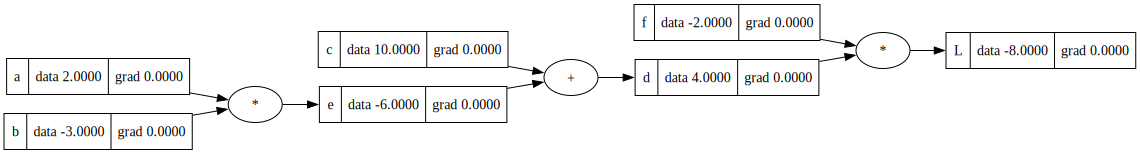

In [14]:
draw_dot(L)

In [15]:
L.grad = 1.0

dL/dd = Value(data=-2.0)
fL/ff = Value(data=4.0)


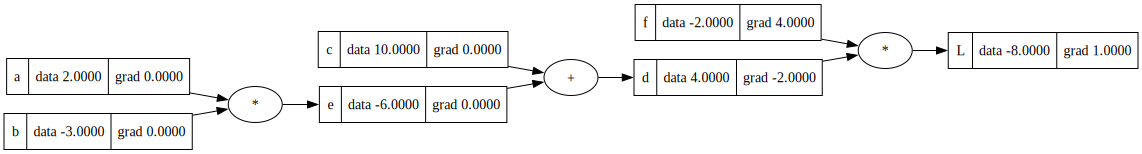

In [16]:
# f(x+h) - f(x)/h


#L = d * f
### (d1 -d2) /h calculation of slope
#dL/dd = ?
#dL resulting of derivation of d 
#dd original function
#so the afecting of d to achieve L is f
# then

# (f*(x +h) - f(x)) /h
# (f*d + f*h - f*d )/h
# f*h / h
# f
d.grad = f.data
print(f"dL/dd = {f}")



#now lest use this but for f
#L = d * f

#fL /ff
#what is afecting f to become L?
# d is the afector so
# (f(x+h) - f(x))/h 
# (d(f+h) - d(f))/h
# (d*f + d*h - d*f )/h
# d*h/h
# d

f.grad = d.data
print(f"fL/ff = {d}")
draw_dot(L)

# Crux backpropagation!(IMPORTANT!)

<p> with this you understand all of back propagation an training of neural networks <p>

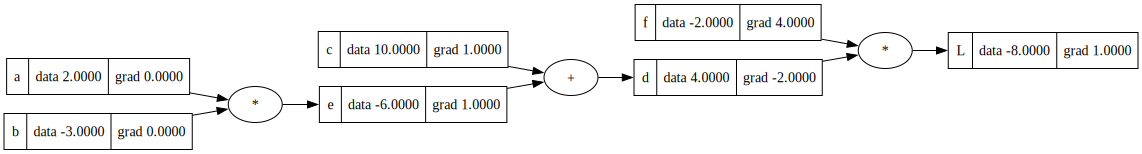

In [17]:
# dL/dc

# dL = f(x+h)
# f = what modifies d to become L
# dL = f(d + h)
d.grad

# how d is affected by e
h = 0.00001
h = Value(h);h.label = 'h'
d1 = c + e
d2 = c + (e + h)

derivative =(d2.data - d1.data) / h.data
e.grad = round(derivative, 10)


# how d is affected by c
h = 0.00001
h = Value(h);h.label = 'h'
d1 = c + e
d2 = e + (c + h)



derivative =(d2.data - d1.data) / h.data 

c.grad = round(derivative, 10)

draw_dot(L)


## Chain Rule

<p>
The chain rule may also be expressed in Leibniz's notation. If a variable z depends on the variable y, which itself depends on the variable x (that is, y and z are dependent variables), then z depends on x as well, via the intermediate variable y. In this case, the chain rule is expressed as 
<p>

$$
\frac{dy}{dx} = \frac{dy}{du} \cdot \frac{du}{dx}
\quad \text{where } y = f(u) \text{ and } u = g(x)
$$

-2.0
-2.0


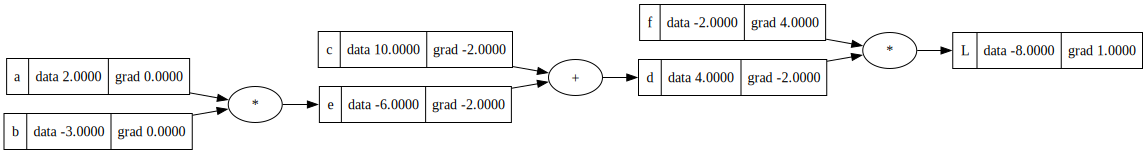

In [18]:
  #dL / dc = (dL / dd) * (dd / dc)
  # basically mutipling derivatives
h = 0.00001
h = Value(h);h.label = 'h'
d1 = c + e
d2 = e + (c + h)



derivative =(d2.data - d1.data) / h.data 
print(d.grad *  round(derivative, 10))
c.grad = d.grad *  round(derivative, 10)


d1 = c + e
d2 = c + (e + h)



derivative =(d2.data - d1.data) / h.data 

e.grad = d.grad *  round(derivative, 10)

print(d.grad) 
draw_dot(L)  

2.0000000000131024
-3.000000000064062


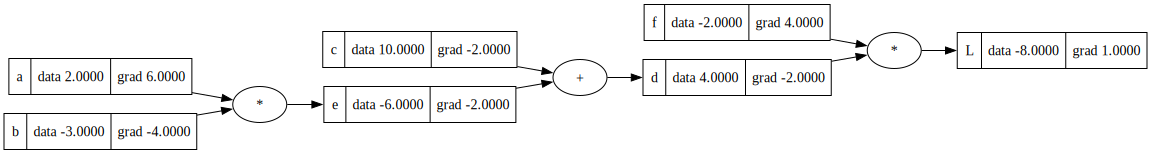

In [19]:
#ed / eb = (ed / ee) * (ee / eb)

h = 0.00001
h = Value(h);h.label = 'h'
d1 = a * b
d2 = a * (b + h)
derivative =(d2.data - d1.data) / h.data 

b.grad = e.grad *  round(derivative, 10)

print(derivative)


#ed / ea = (ed / ee) * (ee / ea)

d1 = b * a
d2 = b * (a + h)

derivative =(d2.data - d1.data) / h.data 

a.grad = e.grad *  round(derivative, 10)

print(derivative)

draw_dot(L)  


**Forward pass:**


\begin{aligned}
n &= x_1 w_1 + x_2 w_2 + b \\
o &= \tanh(n)
\end{aligned}


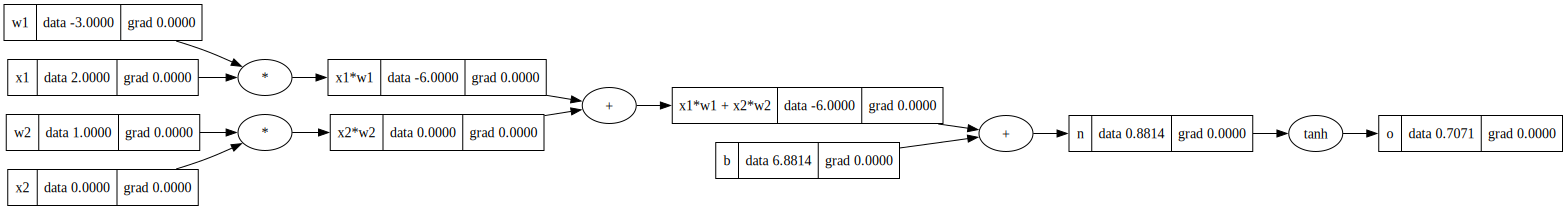

In [21]:
  # inputs x1,x2
x1 = Value(2.0, label='x1')
x2 = Value(0.0, label='x2')
# weights w1,w2
w1 = Value(-3.0, label='w1')
w2 = Value(1.0, label='w2')
# bias of the neuron
b = Value(6.8813735870195432, label='b')
# x1*w1 + x2*w2 + b
x1w1 = x1*w1; x1w1.label = 'x1*w1'
x2w2 = x2*w2; x2w2.label = 'x2*w2'
x1w1x2w2 = x1w1 + x2w2; x1w1x2w2.label = 'x1*w1 + x2*w2'
n = x1w1x2w2 + b; n.label = 'n'
o = n.tanh(); o.label = 'o'
draw_dot(o)  


The hyperbolic tangent of a number \(x\) is defined as:

$$
\tanh(x) = \frac{\sinh(x)}{\cosh(x)}
$$

where 

$$
\sinh(x) = \frac{e^x - e^{-x}}{2}, \quad \cosh(x) = \frac{e^x + e^{-x}}{2}
$$

So explicitly:

$$
\tanh(x) = \frac{e^x - e^{-x}}{e^x + e^{-x}}
$$

For example, for \(x = 2.0\):

$$
\tanh(2.0) = \frac{e^2 - e^{-2}}{e^2 + e^{-2}} \approx 0.964
$$


tanh = 0.7071067811865477
dt/ds (numeric) = 0.7071067812
dt/dc (numeric) = -0.4999964645
s.grad = 0.7071067812
c.grad = -0.4999964645
ds/dn (numeric) = 1.4142185624
dc/dn (numeric) = 1.0000070711
n.grad = 0.5000035355469553


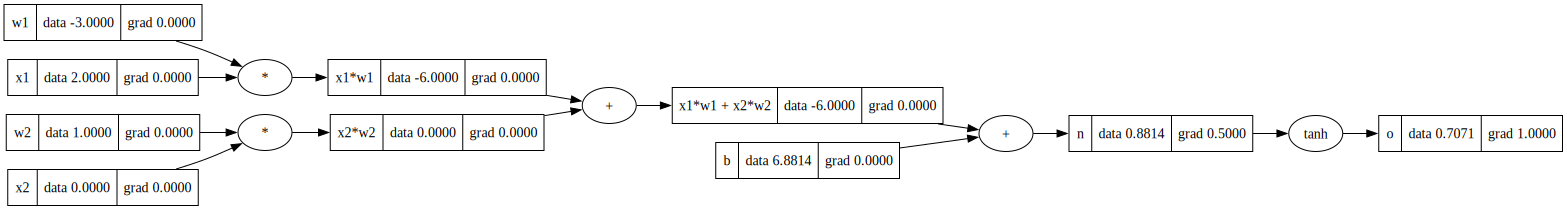

In [ ]:
import numpy as np

# assume n exists (pre-activation), o = Value(np.tanh(n.data)) or similar
o.grad = 1.0

# step size
h = 1e-5
h = Value(h); h.label = 'h'

# intermediate nodes as Value wrappers (so we can store .grad)
s = Value(np.sinh(n.data), label='s')   # sinh(n)
c = Value(np.cosh(n.data), label='c')   # cosh(n)

# current tanh
t = s.data / c.data
print("tanh =", t)

# 1) partials of t = s/c w.r.t. s and c via finite differences
# dt/ds ≈ (t(s+h,c) - t(s,c)) / h = ((s+h)/c - s/c)/h = 1/c  (numeric)
d1 = s.data / c.data
d2 = (s.data + h.data) / c.data
dt_ds = (d2 - d1) / h.data
#derivative of sinh
dt_ds = round(dt_ds, 10)

# dt/dc ≈ (t(s,c+h) - t(s,c)) / h
d1 = s.data / c.data
d2 = s.data / (c.data + h.data)
dt_dc = (d2 - d1) / h.data
#derivative of cosh
dt_dc = round(dt_dc, 10)

print("dt/ds (numeric) =", dt_ds)
print("dt/dc (numeric) =", dt_dc)

# 2) propagate t.grad into s.grad and c.grad
# calculate the grad of sinh and cosh
s.grad = o.grad * dt_ds
c.grad = o.grad * dt_dc
print("s.grad =", s.grad)
print("c.grad =", c.grad)


# perturbation of n
# 3) propagate s.grad and c.grad back to n via finite differences on sinh/cosh
# ds/dn ≈ (sinh(n+h) - sinh(n)) / h  -> numeric (should equal cosh(n))
d1 = np.sinh(n.data)
d2 = np.sinh(n.data + h.data)
ds_dn = (d2 - d1) / h.data
ds_dn = round(ds_dn, 10)

# dc/dn ≈ (cosh(n+h) - cosh(n)) / h  -> numeric (should equal sinh(n))
d1 = np.cosh(n.data)
d2 = np.cosh(n.data + h.data)
dc_dn = (d2 - d1) / h.data
dc_dn = round(dc_dn, 10)

print("ds/dn (numeric) =", ds_dn)
print("dc/dn (numeric) =", dc_dn)

# 4) combine contributions to n.grad (numeric)
n.grad = s.grad * ds_dn + c.grad * dc_dn
print("n.grad =", n.grad)

# optional: visualize graph if available
draw_dot(o)


Step-by-step derivative of :

$$
tanh(x)=\dfrac{\sinh(x)}{\cosh(x)}
$$
1. compute base functions and their x-derivatives:
$$
s=\sinh(x),\quad c=\cosh(x),\quad s'=\frac{d}{dx}\sinh(x)=\cosh(x)=c,\quad c'=\frac{d}{dx}\cosh(x)=\sinh(x)=s
$$

2. partials of the quotient \(t(x)=s/c\):
$$
\frac{\partial t}{\partial s}=\frac{1}{c},\qquad
\frac{\partial t}{\partial c}=-\frac{s}{c^2}
$$

3. chain rule (compose partials with s', c'):
$$
\frac{dt}{dx}
= \frac{\partial t}{\partial s}\,s' \;+\; \frac{\partial t}{\partial c}\,c'
= \frac{1}{c}\,c \;+\; \left(-\frac{s}{c^2}\right)\,s
= 1 - \frac{s^2}{c^2}
= 1 - \left(\frac{s}{c}\right)^2
= 1 - \tanh^2(x).
$$

**Numerical/stability note:** compute 
$$
t=tanh(x)=s/c) then (dt/dx = 1 - t^2) or compute (1/c^2) if (|c|) 
$$
is moderate.
